<div style="text-align: center;">
<h2>INFSCI 2595 Machine Learning - Fall 2018 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Due: Sunday 09/30/2018</h3>
<h3>Total points: 100 </h3>
</div>

In [ ]:
# Type in your information in the double quotes
firstName = ""
lastName = ""
pittID = ""

In [2]:
#Libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

---

<h3>  Problem #1. K-nearest neighbors  [20 points] </h3> 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = 1.2, X2 = 1.3, X3 = 2.4 using K-nearest neighbors.
hint: in problems 1-2 and 1-3, use "stats.mode" from scipy library and "nsmallest" function in dataframe to get n smallest values from the distance table calculated in 1-1.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0.1|2.9|0|Green|
|2 |2.2|0|0|Green|
|3|0|1.3|3.3|Green|
|4|0|1.4|2.5|Red|
|5|-1.2|0|1.4|Red|
|6|1.1|1.2|1.1|Green|
|7|1.5|0|0|Green|
|8|0|1.3|1.9|Red|
|9|0|2.8|0|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point, X1 = 1.2, X2 = 1.3, X3 = 2.4
The output should be a (9*1) column vector where each row shows the distance between the observations and the test point.


In [3]:
Data = pd.DataFrame({'X1':[0.1,2.2,0,0,-1.2,1.1,1.5,0,0],'X2':[2.9,0,1.3,1.4,0,1.2,0,1.3,2.8],'X3':[0,0,3.3,2.5,1.4,1.1,0,1.9,0],'Y':['G','G','G','R','R','G','G','R','G']})
Data['Encode'] = Data['Y'].map({'G':1,'R':0})
X1 = 1.2; X2 = 1.3; X3 = 2.4
D = []
for i in range (9):
    d_2 = pow(Data['X1'][i]-X1,2) + pow(Data['X2'][i]-X2,2) + pow(Data['X3'][i]-X3,2)
    d = pow(d_2,0.5)
    D.append(d)
Data['Distance'] = D
print(Data)

    X1   X2   X3  Y  Encode  Distance
0  0.1  2.9  0.0  G       1  3.087070
1  2.2  0.0  0.0  G       1  2.906888
2  0.0  1.3  3.3  G       1  1.500000
3  0.0  1.4  2.5  R       0  1.208305
4 -1.2  0.0  1.4  R       0  2.906888
5  1.1  1.2  1.1  G       1  1.307670
6  1.5  0.0  0.0  G       1  2.745906
7  0.0  1.3  1.9  R       0  1.300000
8  0.0  2.8  0.0  G       1  3.074085


<b>Problem #1-2.</b> What is our prediction with K = 1? and explain why.

In [4]:
for K in [1,3,5]:
    P = sum(Data.nsmallest(K,'Distance')['Encode'])/K
    if P >= 0.5:
        print('Our prediction is Green with K = {}.'.format(K))
    else:
        print('Our prediction is Red with K = {}.'.format(K))

Our prediction is Red with K = 1.
Our prediction is Red with K = 3.
Our prediction is Green with K = 5.


<h3>  Problem #2. Answer those questions about linear regression [30 points] </h3>  
- Writing a code is not required for this question<br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data.

|Height(x)|Weight(y)|
|:--:|:-------------------------------:|
|63|127|
|64|121|
|66|142|
|69|157|
|69|162|
|71|156|
|71|169|
|72|165|
|73|181|

In [5]:
from numpy.linalg import inv
X = np.matrix(((1,1,1,1,1,1,1,1,1),(63,64,66,69,69,71,71,72,73))).T
Y = np.matrix((127,121,142,157,162,156,169,165,181)).T
Paras =  inv(X.T*X)*X.T*Y
print('beta_0 is {:.3f} and beta_1 is {:.3f}.'.format(Paras[0,0],Paras[1,0]))

beta_0 is -207.503 and beta_1 is 5.255.


In [6]:
x22 = np.array(X[:,1])
y22 = np.array(Y)
x2 = np.mean(x22)
y1 = np.mean(Y)
beta1 = np.sum((x22-x2)*(y22-y1))/np.sum((x22-x2)*(x22-x2))
beta1

5.254901960784314

<b>Problem #2-2.</b> Given the test data below, compute the R-squared metric of the fitted model.

|X(feeding)|Y(death)|
|:--:|:-------------------------------:|
|27|10|
|41|9|
|56|28|
|50|40|
|73|39|
|38|59|
|72|60|
|87|62|
|51|64|

In [7]:
X_test = np.array((27,41,56,50,73,38,72,87,51))
Y_test = np.array((10,9,28,40,39,59,60,62,64))
Y_test_mean = np.mean(Y_test)
Y_predict = []
for i in range(9):
    predict = X_test[i] * Paras[1,0] + Paras[0,0]
    Y_predict.append(predict)
else:
    Y_predict = np.array((Y_predict))
    
RSS = 0
TSS = 0
for i in range(9):
    RSS = RSS + pow(Y_predict[i] - Y_test[i],2)
    TSS = TSS + pow(Y_test[i] - Y_test_mean,2)
else:
    R_square = 1-(RSS/TSS)
    print(R_square)

-20.02744544895176


In [8]:
#built-in validation
#linreg = LinearRegression().fit(X[:,1:],Y)
#print(linreg.coef_,linreg.intercept_)

#from sklearn.metrics import r2_score
#R_square = r2_score(Y_test,Y_predict)
#print(R_square)

<h3>  Problem #3. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>

Here use a code below to download the  dataset: 

In [9]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Hint: You may need to "import statsmodels.formula.api as smf" for some statistical analysis

<b>Problem #3-1</b> Print the description of the dataset. 

<b> Answer the following question:</b> 

- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 

In [10]:
print(dataset.DESCR)
# The abbreviation of the target value:
# MEDV, Median value of owner-occupied homes in $1000's

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

=======================================================================================================================

<b>Problem #3-2 </b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" function)<br>

Follow two steps to answer questions.
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> 

-  Which feature has the lowest range (minimum and maximum value)?

-  Which feature has the higest mean?  

-  Which feature has a highest variance? 

In [11]:
#print(dataset.feature_names)
DataframeX = pd.DataFrame({'CRIM':dataset.data[:,0],'ZN':dataset.data[:,1],'INDUS':dataset.data[:,2],'CHAS':dataset.data[:,3],'NOX':dataset.data[:,4],'RM':dataset.data[:,5],'AGE':dataset.data[:,6],'DIS':dataset.data[:,7],'RAD':dataset.data[:,8],'TAX':dataset.data[:,9],'PTRATIO':dataset.data[:,10],'B':dataset.data[:,11],'LSTAT':dataset.data[:,12]})
DataframeY = pd.DataFrame({'target':dataset.target})
#Dataframe.describe()  This description does not include 'Range'

In [12]:
# Adding 'Range' to the descriptive statistics

A = DataframeX.describe()

Range = A.loc['max',:] - A.loc['min',:]    #or A.iloc[1,:] to call a row

A.loc['range'] = Range #dataframe.loc['new row labe'] to add a row

B = A.reindex(index = ['count','range','mean','std','min','25%','50%','75%','max']) #rearrange the rows
#B

In [13]:
#adding variance to an ideal row position
Var = pow (A.loc['std'],2)
B.loc['variance'] = Var
B = B.reindex(index = ['count','range','variance','mean','std','min','25%','50%','75%','max'])
#B

In [14]:
#Extract 'variance' and 'range' from previous table B
FinalTable = B.reindex(index = ['range','mean','variance'])
FinalTable


#or
#FinalTable = B.loc['range':'mean',:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,396.580000,36.240000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
variance,73.904671,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.994760


<b>Problem #3-3 </b> Feature Scaling

<b> Answer the following questions:</b> 

- From the information above, Do you recommend **feature scaling** to improve performance? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

In [15]:
#print(dataset.feature_names)
DataframeX = pd.DataFrame({'CRIM':dataset.data[:,0],'ZN':dataset.data[:,1],'INDUS':dataset.data[:,2],'CHAS':dataset.data[:,3],'NOX':dataset.data[:,4],'RM':dataset.data[:,5],'AGE':dataset.data[:,6],'DIS':dataset.data[:,7],'RAD':dataset.data[:,8],'TAX':dataset.data[:,9],'PTRATIO':dataset.data[:,10],'B':dataset.data[:,11],'LSTAT':dataset.data[:,12]})
DataframeY = pd.DataFrame({'target':dataset.target})

<b>Problem #3-4 </b> Calculate and report **correlations** between features and the target 

<b> Answer the following questions:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the feature that is most correlated with the target? Do you think it is the most or the least helpful features in predicting the
target class? Explain.

In [16]:
DataframeX = pd.DataFrame({'CRIM':dataset.data[:,0],'ZN':dataset.data[:,1],'INDUS':dataset.data[:,2],'CHAS':dataset.data[:,3],'NOX':dataset.data[:,4],'RM':dataset.data[:,5],'AGE':dataset.data[:,6],'DIS':dataset.data[:,7],'RAD':dataset.data[:,8],'TAX':dataset.data[:,9],'PTRATIO':dataset.data[:,10],'B':dataset.data[:,11],'LSTAT':dataset.data[:,12]})
#DataframeY = pd.DataFrame({'target':dataset.target})
Dataframe = DataframeX
Dataframe['target'] = dataset.target

correlation_coef2 = np.corrcoef([Dataframe['CRIM'],Dataframe['ZN'],Dataframe['INDUS'],Dataframe['CHAS'],Dataframe['NOX'],Dataframe['RM'],Dataframe['AGE'],Dataframe['DIS'],Dataframe['RAD'],Dataframe['TAX'],Dataframe['PTRATIO'],Dataframe['B'],Dataframe['LSTAT'],Dataframe['target']])
#print(dataset.feature_names)
C = correlation_coef2[:-1,13]
#DataframeC = pd.DataFrame(C,columns = ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
# 'B' 'LSTAT'] )

DataframeC = pd.DataFrame([C],columns = dataset.feature_names) #[] make array c be considered as a row rather than a column.
DataframeC.loc['correlations with target'] = DataframeC.loc[0]
Dataframe_correlations = DataframeC.iloc[1:2,:]
Dataframe_correlations

#Dataframe.corr() #dataframe 形式 correlation matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
correlations with target,-0.385832,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663


=======================================================================================================================

<b>Problem #3-5 </b> 
Follow two steps to answer questions.

- Add 1 more column (dataset.target) to your DataFrame (give a name).

- Find the correlation matrix that shows the correlation between each pair of features. <br>

- Plot a correlation matrix<br> You can use the code below or write your own code to plot a correlation matrix *(extra point for writing your own code)* 

 <b>Answer the following questions:</b> 

- What is the correlation between the feature RM and the LSTAT?
- What does this value of correlation indicate?

In [17]:
Dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [18]:
Dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


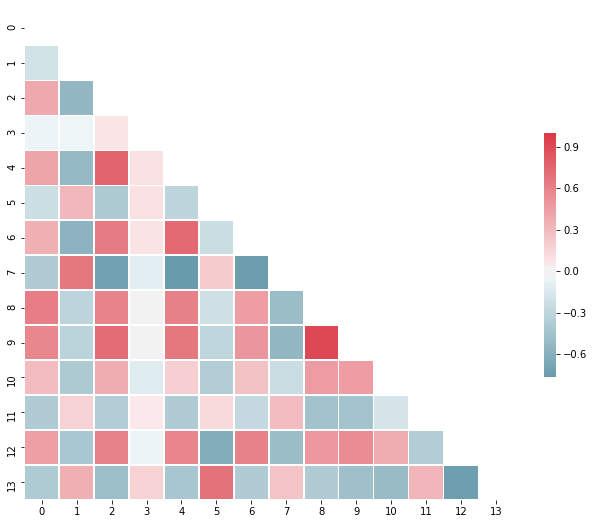

In [19]:
#plot the matrix
mask = np.zeros_like(correlation_coef2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # this generates an upper mask for the plot

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True) #generate a custom diverging color map.
sns.heatmap(correlation_coef2, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

=======================================================================================================================

<b>Problem #3-6 </b> Scatter plot. <br> 

Follow three steps to answer questions <br> 
- Plot RM versus target variable 
- Plot TAX versus target variable 
- Plot LSTAT versus target variable <br> 

<b> Answer the following questions:</b> 
- Is the relationship linear?
- Which looks the most nonlinear? Explain your choice


**Plot RM versus target variable**

Text(0.5,1,'RM vs. target')

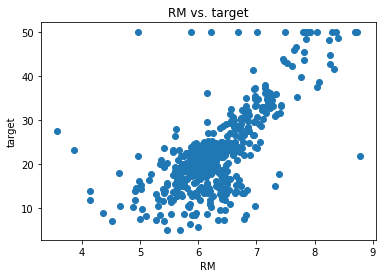

In [20]:
#Dataframe
RM = Dataframe['RM']
target = Dataframe['target']
plt.scatter(RM, target, marker = 'o')
plt.xlabel('RM')
plt.ylabel('target')
plt.title('RM vs. target')

**Plot TAX versus target variable**

Text(0.5,1,'TAX vs. target')

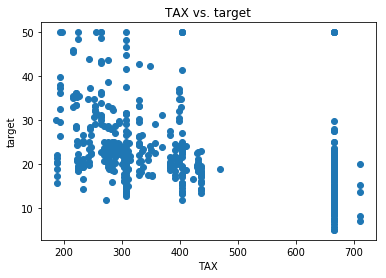

In [21]:
TAX = Dataframe['TAX']
target = Dataframe['target']
plt.scatter(TAX, target, marker = 'o')
plt.xlabel('TAX')
plt.ylabel('target')
plt.title('TAX vs. target')

**Plot LSTAT versus target variable **

Text(0.5,1,'LSTAT vs. target')

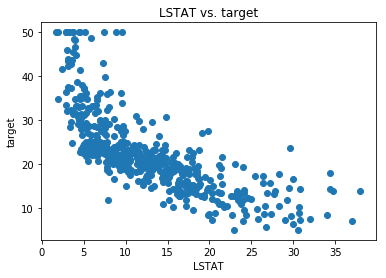

In [22]:
#code here
LSTAT = Dataframe['LSTAT']
target = Dataframe['target']
plt.scatter(LSTAT, target, marker = 'o')
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.title('LSTAT vs. target')

=======================================================================================================================

<b>Problem #3-7.</b> Follow steps to answer questions.
> *Use train_test_split() with the option "random_state=0".

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^4$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

**1.  Fit a linear regression model with RM and LSTAT features only**

In [23]:
x = Dataframe[['RM','LSTAT']]
y = Dataframe['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

from sklearn import preprocessing
from sklearn.metrics import r2_score

scalar = preprocessing.MinMaxScaler().fit(x_train)
x_train_tf = scalar.transform(x_train) 
x_test_tf = scalar.transform(x_test)

linreg = LinearRegression().fit(x_train_tf,y_train)
y_predict = linreg.predict(x_test_tf)
test_R_square = r2_score(y_test,y_predict)

A = ['RM','LSTAT']
for i in range(2):
    print('The coeficient for {} is {:,.3f}'.format(A[i],linreg.coef_[i]))
else: 
    print('The intercept is {:.3f}'.format(linreg.intercept_))
    print('R^2 is {}'.format(test_R_square))

The coeficient for RM is 26.188
The coeficient for LSTAT is -23.777
The intercept is 16.097
R^2 is 0.5692445415835345


**2 Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT)**

In [24]:
Dataframe1 = Dataframe
Dataframe1['RM*LSTAT'] = Dataframe['RM']*Dataframe['LSTAT']

x = Dataframe1[['RM','LSTAT','RM*LSTAT']]
y = Dataframe['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

scalar = preprocessing.MinMaxScaler().fit(x_train)
x_train_tf = scalar.transform(x_train)
x_test_tf = scalar.transform(x_test)

linreg1 = LinearRegression().fit(x_train_tf,y_train)
y_predict1 = linreg1.predict(x_test_tf)
test_R_square1 = r2_score(y_test,y_predict1)


A = ['RM','LSTAT','RM*LSTAT']
for i in range(3):
    print('The coeficient for {} is {:,.3f}'.format(A[i],linreg1.coef_[i]))
else: 
    print('The intercept is {:.3f}'.format(linreg1.intercept_))
    print('R^2 is {}'.format(test_R_square1))

The coeficient for RM is 51.769
The coeficient for LSTAT is 83.369
The coeficient for RM*LSTAT is -89.790
The intercept is 2.350
R^2 is 0.6615207706770683


**3 Fit a linear regression model using LSTAT and include the polynomial term (  LSTAT^2 )**

In [25]:
Dataframe2 = Dataframe
Dataframe2['LSTAT^2'] = pow(Dataframe['LSTAT'],2)

x = Dataframe2[['LSTAT','LSTAT^2']]
y = Dataframe['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

scalar = preprocessing.MinMaxScaler().fit(x_train)
x_train_tf = scalar.transform(x_train)
x_test_tf = scalar.transform(x_test)

linreg2 = LinearRegression().fit(x_train_tf,y_train)
y_predict2 = linreg2.predict(x_test_tf)
test_R_square2 = r2_score(y_test,y_predict2)


A = ['LSTAT','LSTAT^2']
for i in range(2):
    print('The coeficient for {} is {:,.3f}'.format(A[i],linreg2.coef_[i]))
else: 
    print('The intercept is {:.3f}'.format(linreg2.intercept_))
    print('R^2 is {}'.format(test_R_square2))

The coeficient for LSTAT is -84.001
The coeficient for LSTAT^2 is 61.720
The intercept is 39.059
R^2 is 0.55187533541378


**4. Fit linear regression model using LSTAT and include the polynomial term (  LSTAT^2  and  LSTAT^4)**

In [26]:
Dataframe3 = Dataframe
Dataframe3['LSTAT^2'] = pow(Dataframe['LSTAT'],2)
Dataframe3['LSTAT^4'] = pow(Dataframe['LSTAT'],4)

x = Dataframe3[['LSTAT','LSTAT^2','LSTAT^4']]
y = Dataframe['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

scalar = preprocessing.MinMaxScaler().fit(x_train)
x_train_tf = scalar.transform(x_train)
x_test_tf = scalar.transform(x_test)

linreg3 = LinearRegression().fit(x_train_tf,y_train)
y_predict3 = linreg3.predict(x_test_tf)
test_R_square3 = r2_score(y_test,y_predict3)


A = ['LSTAT','LSTAT^2','LSTAT^4']
for i in range(3):
    print('The coeficient for {} is {:,.3f}'.format(A[i],linreg3.coef_[i]))
else: 
    print('The intercept is {:.3f}'.format(linreg3.intercept_))
    print('R^2 is {}'.format(test_R_square3))

The coeficient for LSTAT is -116.244
The coeficient for LSTAT^2 is 127.407
The coeficient for LSTAT^4 is -44.803
The intercept is 41.382
R^2 is 0.5696493127277741


=========================================================================================================================

<b>Problem #3-8.</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report<br> 

> (1) p-values for each feature. 

<b> Answer the following questions:</b> 

- What does p-value means
- What are the important features? <br> 


In [27]:
model = smf.ols(formula = 'target ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data = Dataframe).fit()
model.summary()
#model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          6.95e-135
Time:                        22:38:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

==========================================================================+============================================== <br> =========================================================================================================================

<b>Problem #4.</b>  Encoding categorical values

Given a dataset (encoding.csv) with three features and twenty samples with the following types:

- "Gender" is nominal feature in which order is not important (mapping can be used)
- "Race" is nominal feature (all values have the same weight). label encoding and one-hot encoding can be used together.
- "Satisfaction" is nominal feature in which order is important (label encoding can be used)

Use appropriate encoding method for each feature to convert the categorical values into a meaningful numerical values.

In [1]:
from pandas import read_csv
dataset = read_csv('encoding.csv')
dataset

,Gender,Race,Satisfaction
0,Male,White_not_Hispanic,Very Unhappy
1,Male,White_not_Hispanic,Neutral
2,Male,White_not_Hispanic,Very Unhappy
3,Female,Asian_&_Pacific_Islander,Happy
4,Male,Asian_&_Pacific_Islander,Neutral
5,Female,Black_not_Hispanic,Neutral
6,Male,Black_not_Hispanic,Very Unhappy
7,Female,Black_not_Hispanic,Happy
8,Female,White_not_Hispanic,Happy
9,Female,Black_not_Hispanic,Neutral


In [3]:
dataset['GenderEncode'] = dataset.Gender.map({'Male':1,'Female':0})   #mapping genders into 1 or 0.
from sklearn.preprocessing import LabelEncoder
dataset['SatisfactionEncode'] = LabelEncoder().fit_transform(dataset.Satisfaction) #when order is considered, use label encoder.
dataset

,Gender,Race,Satisfaction,GenderEncode,SatisfactionEncode
0,Male,White_not_Hispanic,Very Unhappy,1,4
1,Male,White_not_Hispanic,Neutral,1,1
2,Male,White_not_Hispanic,Very Unhappy,1,4
3,Female,Asian_&_Pacific_Islander,Happy,0,0
4,Male,Asian_&_Pacific_Islander,Neutral,1,1
5,Female,Black_not_Hispanic,Neutral,0,1
6,Male,Black_not_Hispanic,Very Unhappy,1,4
7,Female,Black_not_Hispanic,Happy,0,0
8,Female,White_not_Hispanic,Happy,0,0
9,Female,Black_not_Hispanic,Neutral,0,1


In [7]:
dataset['RaceEncode'] = LabelEncoder().fit_transform(dataset['Race']) #label encoding the race
#dataset

In [8]:
from sklearn.preprocessing import OneHotEncoder # Then one hot encoding the race
ROHE = OneHotEncoder(sparse = False).fit_transform(dataset[['RaceEncode']])

dataset['American_Indian_&_Alaska_Native'] = ROHE[:,0] # associate columns in one hot encoding matrix with correct column names.
dataset['Asian_&_Pacific_Islander'] = ROHE[:,1]
dataset['Black_not_Hispanic'] = ROHE[:,2]
dataset['Hispanic'] = ROHE[:,3]
dataset['White_not_Hispanic'] = ROHE[:,4]
#dataset

In [4]:
EncodedDataset = dataset.loc[:,'GenderEncode':'White_not_Hispanic']    #A.loc[:,'columnname1':'columnname2'] 会包含'columnname2'的内容
EncodedDataset                                                         #A.iloc[:,1:2] 只会包含A中第一列的信息

,GenderEncode,SatisfactionEncode,RaceEncode,American_Indian_&_Alaska_Native,Asian_&_Pacific_Islander,Black_not_Hispanic,Hispanic,White_not_Hispanic
0,1,4,4,0.0,0.0,0.0,0.0,1.0
1,1,1,4,0.0,0.0,0.0,0.0,1.0
2,1,4,4,0.0,0.0,0.0,0.0,1.0
3,0,0,1,0.0,1.0,0.0,0.0,0.0
4,1,1,1,0.0,1.0,0.0,0.0,0.0
5,0,1,2,0.0,0.0,1.0,0.0,0.0
6,1,4,2,0.0,0.0,1.0,0.0,0.0
7,0,0,2,0.0,0.0,1.0,0.0,0.0
8,0,0,4,0.0,0.0,0.0,0.0,1.0
9,0,1,2,0.0,0.0,1.0,0.0,0.0


### Submission
Once you complete the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb